In [1]:
import mne
import numpy as np
import sys
import re
import matplotlib.pyplot as plt
from scipy.io import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import LeaveOneOut
import warnings
from sklearn.exceptions import UndefinedMetricWarning

### Loading files

In [4]:
eyes_open_files = [r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10002_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10139_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10140_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10142_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10148_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10155_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10158_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10160_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10161_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10165_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10166_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10169_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10171_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10174_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10175_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10188_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10189_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10190_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10192_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10193_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10194_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10195_p01_epoched_EyesOpen_marked.set',
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10203_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10204_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10207_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10209_p01_epoched_EyesOpen_marked.set', 
                   r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10213_p01_epoched_EyesOpen_marked.set']
eyes_closed_files = [r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10213_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10209_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10207_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10204_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10203_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10195_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10194_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10193_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10192_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10190_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10189_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10188_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10175_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10174_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10171_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10169_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10166_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10165_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10161_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10160_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10158_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10155_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10148_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10142_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10140_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10139_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_60EpochsMarked.set',
                      r'E:\ChristianMusaeus\Data\Eyes_closed_marked\10002_p01_epoched_60EpochsMarked.set']

set_files = eyes_open_files+eyes_closed_files

### Pre-processing

In [5]:
# empty lists to hold the data and labels
X_list = []  # Features (PSD data)
y_list = []  # Labels (eyes-open/eyes-closed)    
subject_ids = []


# loop through each subject
for file in set_files:
    # Load the .set file for the subject
    epochs = mne.io.read_epochs_eeglab(file)
    
    # loading .set data as MATLAB to extract labels
    mat = loadmat(file, struct_as_record=False, squeeze_me=True)
    rejmanual = mat['reject'].rejmanual  # array of 0 and 1

    # getting labels from rejmanual 
    labels = np.array(rejmanual, dtype=int)

    # computing PSD for the current subject
    psd = epochs.compute_psd()

    # getting the PSD data and reshaping it (flattening the 3d array to 2d for logistic regression)
    psd_data = psd.get_data()  # Shape: (n_epochs, n_channels, n_freqs)

    # extracting marked epochs 
    eyes_marked = labels == 0
    psd_data_marked = psd_data[eyes_marked]

    # assigning labels based on file type
    if file in eyes_closed_files:
        final_labels = np.ones(psd_data_marked.shape[0], dtype=int)
    else:
        final_labels = np.zeros(psd_data_marked.shape[0], dtype=int)

    # flattening the data into a 2d matrix 
    psd_data_final = psd_data_marked.reshape(psd_data_marked.shape[0], -1)  # Shape: (n_epochs, n_channels * n_freqs)

    X_list.append(psd_data_final)
    y_list.append(final_labels)

    # Extracting the subject IDs from the file path
    match = re.search(r'\\(\d{5})_', file)
    if match:
        subject_id = int(match.group(1))
    else:
        raise ValueError(f"Could not extract subject ID from path: {file}")

    subject_ids.extend([subject_id] * psd_data_final.shape[0])


X_combined = np.vstack(X_list)  # Shape: (total_epochs, n_channels * n_freqs)
y_combined = np.hstack(y_list)  # Shape: (total_epochs,)
subject_ids = np.array(subject_ids)

print(subject_ids)

Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10002_p01_epoched_EyesOpen_marked.set...
Not setting metadata
1807 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10135_p01_epoched_EyesOpen_marked.set...
Not setting metadata
1901 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10136_p01_epoched_EyesOpen_marked.set...
Not setting metadata
3123 matching events found
No baseline correction applied
0 projection items activated
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting parameters from E:\ChristianMusaeus\Data\Eyes_closed_marked\10138_p01_epoched_EyesOpen_marked.set...
Not setting metadata
185

# Plotting subjects eyes open vs eyes closed plots

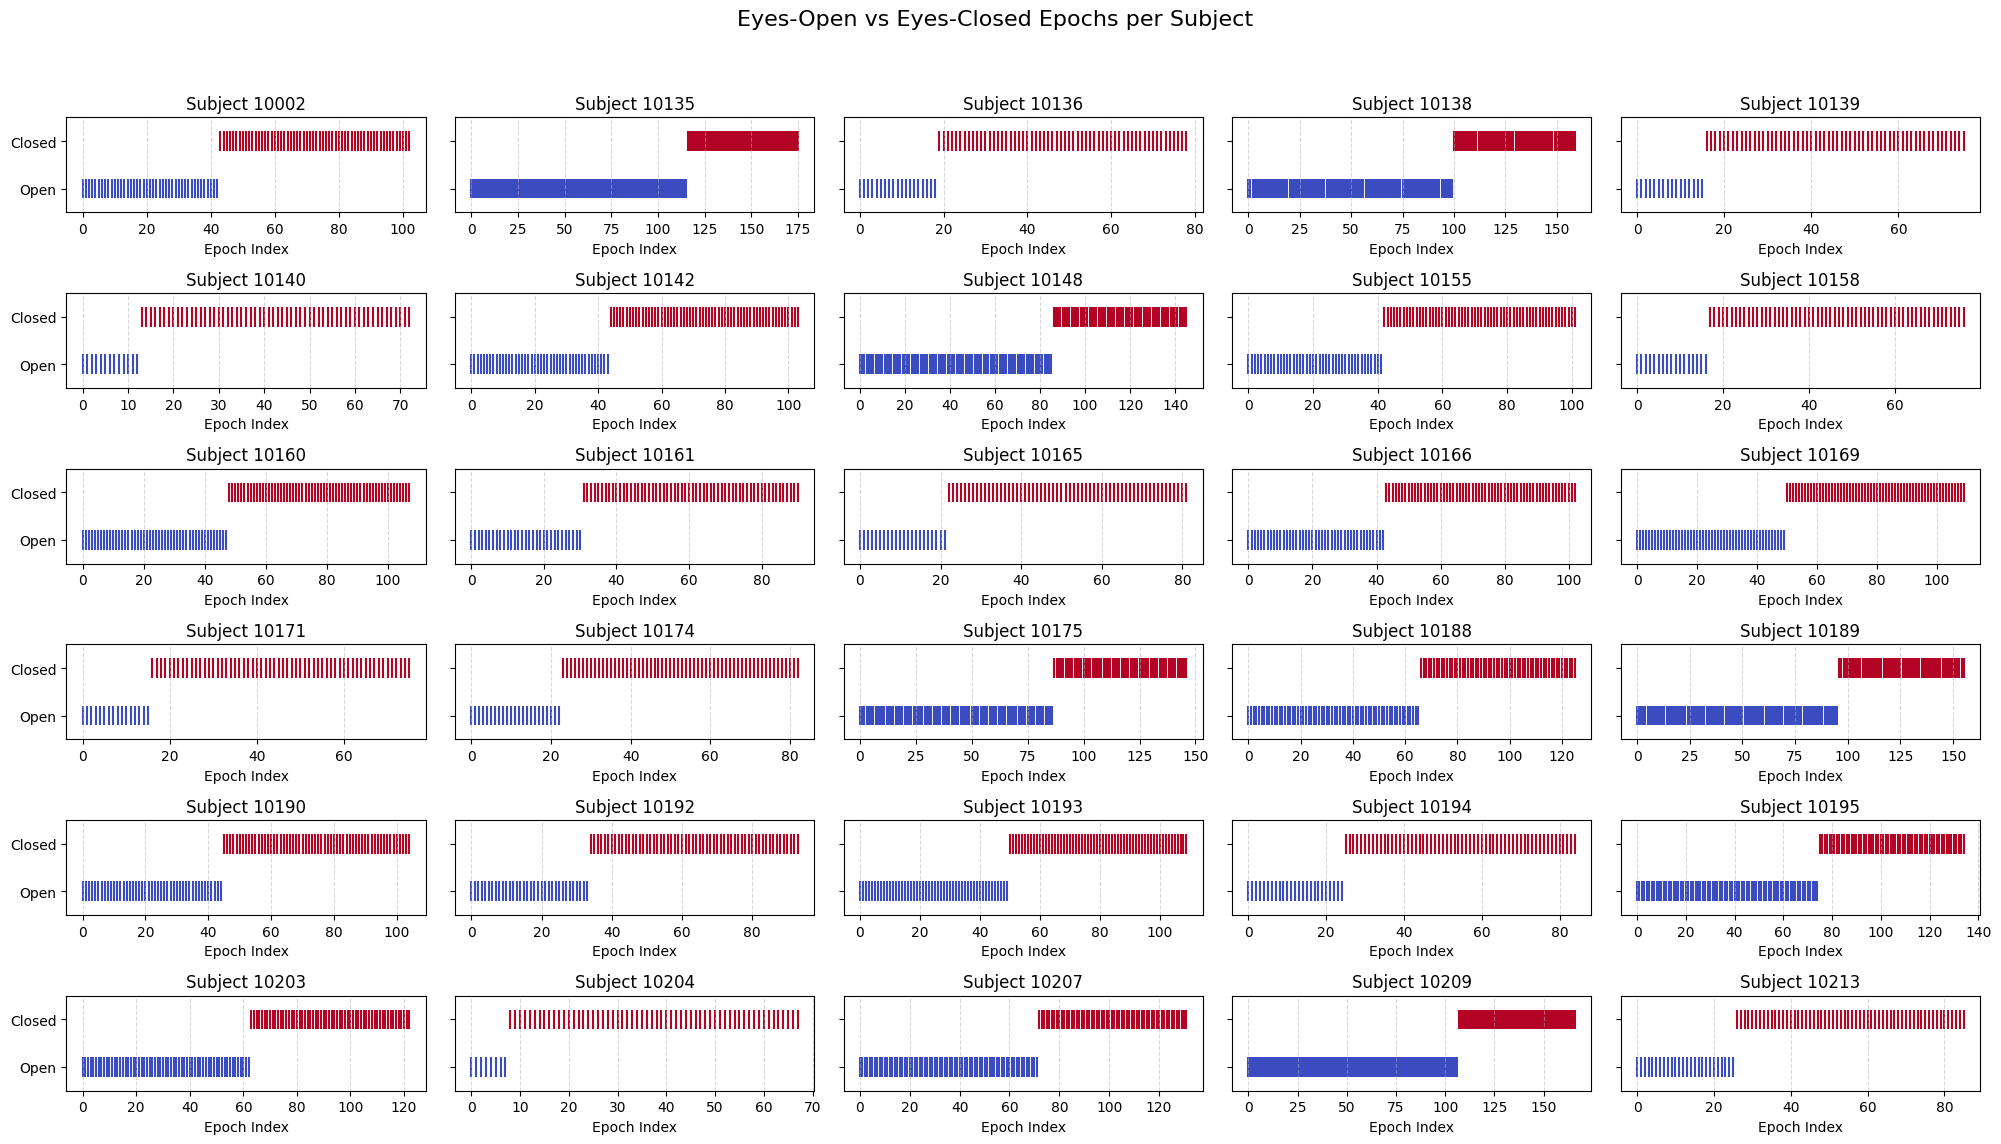

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Combine into a DataFrame for easy grouping
df = pd.DataFrame({
    'epoch_index': np.arange(len(y_combined)),
    'label': y_combined,
    'subject_id': subject_ids
})

# Unique subjects
unique_subjects = np.unique(subject_ids)
n_subjects = len(unique_subjects)

# Plot configuration
ncols = 5
nrows = int(np.ceil(n_subjects / ncols))
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 2), sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each subject's data
for i, subject_id in enumerate(unique_subjects):
    sub_df = df[df['subject_id'] == subject_id].reset_index(drop=True)
    axs[i].scatter(sub_df.index, sub_df['label'], c=sub_df['label'], cmap='coolwarm', marker='|', s=200)
    axs[i].set_title(f'Subject {subject_id}')
    axs[i].set_yticks([0, 1])
    axs[i].set_yticklabels(['Open', 'Closed'])
    axs[i].set_xlabel('Epoch Index')
    axs[i].set_ylim(-0.5, 1.5)
    axs[i].grid(axis='x', linestyle='--', alpha=0.5)

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Eyes-Open vs Eyes-Closed Epochs per Subject', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
print("Channel order:", psd.info['ch_names'])

Channel order: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']


# Logistic Regression

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import log_loss

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# -------- INPUT DATA --------
X_flat = X_combined
y = y_combined
subjects = subject_ids

# Parameters
n_channels = 19
n_freqs = X_flat.shape[1] // n_channels
X = X_flat.reshape(-1, n_channels, n_freqs)

freq_bin_options = [5, 10, 15, 20]
C_grid = [0.01, 0.1, 1, 10, 100]  # Regularization parameters

best_n_bins_per_fold = []
best_C_per_fold = []

def reduce_freq_resolution(X, n_bins):
    bin_size = n_freqs // n_bins
    reduced = np.stack([
        X[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1)

# Outer LOSO
unique_subjects = np.unique(subjects)
outer_loo = LeaveOneOut()

all_y_true = []
all_y_pred = []
all_y_scores = []
all_probs_lr = []

fold_accuracies = []
subject_accuracies = []

for fold_idx, (train_subj_idx, test_subj_idx) in enumerate(outer_loo.split(unique_subjects), 1):
    print(f"\r🔁 Fold {fold_idx}/{len(unique_subjects)}", end="", flush=True)

    test_subj = unique_subjects[test_subj_idx[0]]
    train_subjs = unique_subjects[train_subj_idx]

    train_idx = np.where(np.isin(subjects, train_subjs))[0]
    test_idx = np.where(subjects == test_subj)[0]

    X_train_raw, X_test_raw = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    subj_train_ids = subjects[train_idx]

    # --- Inner CV: select best (n_bins, C) ---
    inner_loo = LeaveOneOut()
    inner_subjects = np.unique(subj_train_ids)

    best_score = -np.inf
    best_n_bins = None
    best_C = None
    best_n_bins_per_fold.append(best_n_bins)
    best_C_per_fold.append(best_C)

    for n_bins in freq_bin_options:
        for C in C_grid:
            inner_scores = []

            for inner_train_idx, inner_val_idx in inner_loo.split(inner_subjects):
                inner_train_subjs = inner_subjects[inner_train_idx]
                inner_val_subj = inner_subjects[inner_val_idx[0]]

                inner_train_idxs = np.where(np.isin(subj_train_ids, inner_train_subjs))[0]
                inner_val_idxs = np.where(subj_train_ids == inner_val_subj)[0]

                X_inner_train = reduce_freq_resolution(X_train_raw[inner_train_idxs], n_bins)
                X_inner_val = reduce_freq_resolution(X_train_raw[inner_val_idxs], n_bins)
                y_inner_train = y_train[inner_train_idxs]
                y_inner_val = y_train[inner_val_idxs]

                scaler = StandardScaler()
                X_inner_train = scaler.fit_transform(X_inner_train)
                X_inner_val = scaler.transform(X_inner_val)

                clf = LogisticRegression(max_iter=1000, C=C)
                clf.fit(X_inner_train, y_inner_train)
                preds = clf.predict(X_inner_val)
                probs = clf.predict_proba(X_inner_val)[:, 1]
                loss = log_loss(y_inner_val, probs, labels=[0, 1])
                inner_scores.append(-loss)  # negative, since lower loss is better


            mean_score = np.mean(inner_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_n_bins = n_bins
                best_C = C

    # --- Train final model with best hyperparams ---
    X_train_final = reduce_freq_resolution(X_train_raw, best_n_bins)
    X_test_final = reduce_freq_resolution(X_test_raw, best_n_bins)

    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_final)
    X_test_final = scaler.transform(X_test_final)

    final_model = LogisticRegression(max_iter=1000, C=best_C)
    final_model.fit(X_train_final, y_train)

    y_prob = final_model.predict_proba(X_test_final)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_scores.extend(y_prob)
    all_probs_lr.append(y_prob)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    subject_accuracies.append(test_subj)



🔁 Fold 30/30

# Saving best_C_all and best_n_bins_all 

In [55]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, log_loss
)
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from collections import defaultdict

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# -------- INPUT DATA --------
X_flat = X_combined
y = y_combined
subjects = subject_ids

# Parameters
n_channels = 19
n_freqs = X_flat.shape[1] // n_channels
X = X_flat.reshape(-1, n_channels, n_freqs)

freq_bin_options = [5, 10, 15, 20]
C_grid = [0.01, 0.1, 1, 10, 100]  # Regularization parameters

def reduce_freq_resolution(X, n_bins):
    bin_size = n_freqs // n_bins
    reduced = np.stack([
        X[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1)

# For storing final evaluation metrics
unique_subjects = np.unique(subjects)
outer_loo = LeaveOneOut()

all_y_true = []
all_y_pred = []
all_y_scores = []
all_probs_lr = []

fold_accuracies = []
subject_accuracies = []

# Track mean inner CV scores for each (n_bins, C)
param_scores = defaultdict(list)

for fold_idx, (train_subj_idx, test_subj_idx) in enumerate(outer_loo.split(unique_subjects), 1):
    print(f"\r🔁 Fold {fold_idx}/{len(unique_subjects)}", end="", flush=True)

    test_subj = unique_subjects[test_subj_idx[0]]
    train_subjs = unique_subjects[train_subj_idx]

    train_idx = np.where(np.isin(subjects, train_subjs))[0]
    test_idx = np.where(subjects == test_subj)[0]

    X_train_raw, X_test_raw = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    subj_train_ids = subjects[train_idx]

    # --- Inner CV: select best (n_bins, C) ---
    inner_loo = LeaveOneOut()
    inner_subjects = np.unique(subj_train_ids)

    best_score = -np.inf
    best_n_bins = None
    best_C = None

    for n_bins in freq_bin_options:
        for C in C_grid:
            inner_scores = []

            for inner_train_idx, inner_val_idx in inner_loo.split(inner_subjects):
                inner_train_subjs = inner_subjects[inner_train_idx]
                inner_val_subj = inner_subjects[inner_val_idx[0]]

                inner_train_idxs = np.where(np.isin(subj_train_ids, inner_train_subjs))[0]
                inner_val_idxs = np.where(subj_train_ids == inner_val_subj)[0]

                X_inner_train = reduce_freq_resolution(X_train_raw[inner_train_idxs], n_bins)
                X_inner_val = reduce_freq_resolution(X_train_raw[inner_val_idxs], n_bins)
                y_inner_train = y_train[inner_train_idxs]
                y_inner_val = y_train[inner_val_idxs]

                scaler = StandardScaler()
                X_inner_train = scaler.fit_transform(X_inner_train)
                X_inner_val = scaler.transform(X_inner_val)

                clf = LogisticRegression(max_iter=1000, C=C)
                clf.fit(X_inner_train, y_inner_train)
                probs = clf.predict_proba(X_inner_val)[:, 1]
                loss = log_loss(y_inner_val, probs, labels=[0, 1])
                inner_scores.append(-loss)  # negative log-loss

            mean_score = np.mean(inner_scores)
            param_scores[(n_bins, C)].append(mean_score)

            if mean_score > best_score:
                best_score = mean_score
                best_n_bins = n_bins
                best_C = C

    # --- Train final model with best hyperparams ---
    X_train_final = reduce_freq_resolution(X_train_raw, best_n_bins)
    X_test_final = reduce_freq_resolution(X_test_raw, best_n_bins)

    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_final)
    X_test_final = scaler.transform(X_test_final)

    final_model = LogisticRegression(max_iter=1000, C=best_C)
    final_model.fit(X_train_final, y_train)

    y_prob = final_model.predict_proba(X_test_final)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_scores.extend(y_prob)
    all_probs_lr.append(y_prob)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    subject_accuracies.append(test_subj)

# ----- After all folds: compute best overall (n_bins, C) -----
avg_param_scores = {param: np.mean(scores) for param, scores in param_scores.items()}
best_n_bins_all, best_C_all = max(avg_param_scores.items(), key=lambda x: x[1])[0]

print("\n\n Best hyperparameters across all folds:")
print(f"  best_n_bins_all = {best_n_bins_all}")
print(f"  best_C_all = {best_C_all}")


🔁 Fold 30/30

📄 Best hyperparameters across all folds:
  ✅ best_n_bins_all = 15
  ✅ best_C_all = 0.01


### saving the lists as individual files 

In [56]:
np.save("predicted_labels_lr.npy", np.array(all_y_pred))
np.save("predicted_scores_lr.npy", np.array(all_y_scores))
np.save("logreg_probabilites_lr.npy", np.array(all_probs_lr, dtype=object))
np.save("accuracy_per_fold_lr.npy", np.array(fold_accuracies))
np.save("subject_ids_lr.npy", np.array(subject_accuracies))

In [ ]:
print("\n\n Nested LOSO CV complete!")
print(f"Overall accuracy: {accuracy_score(all_y_true, all_y_pred):.4f}")
print(f"Precision: {precision_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, zero_division=0))



Nested LOSO CV complete!
Overall accuracy: 0.8526
Precision: 0.8347
Recall:    0.9117
F1 Score:  0.8715

Confusion Matrix:
[[1158  325]
 [ 159 1641]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1483
           1       0.83      0.91      0.87      1800

    accuracy                           0.85      3283
   macro avg       0.86      0.85      0.85      3283
weighted avg       0.85      0.85      0.85      3283



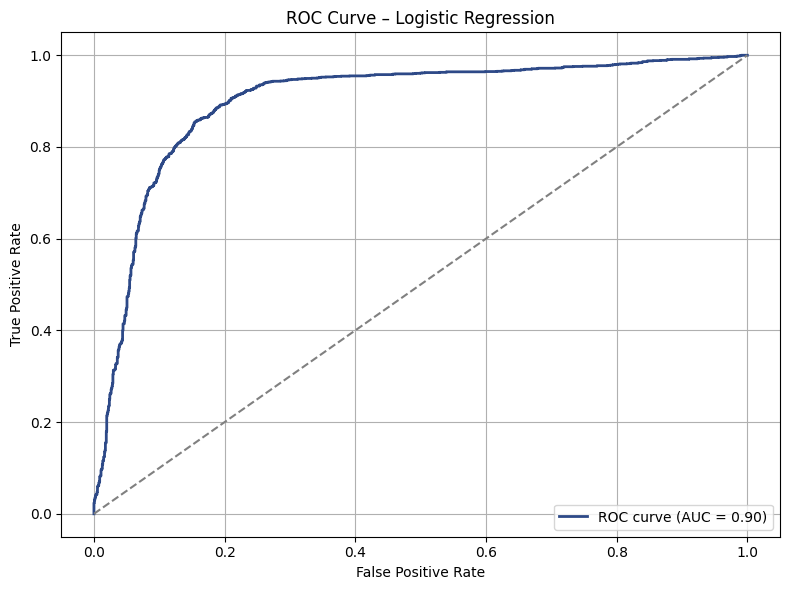

In [10]:
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#2d4987", lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

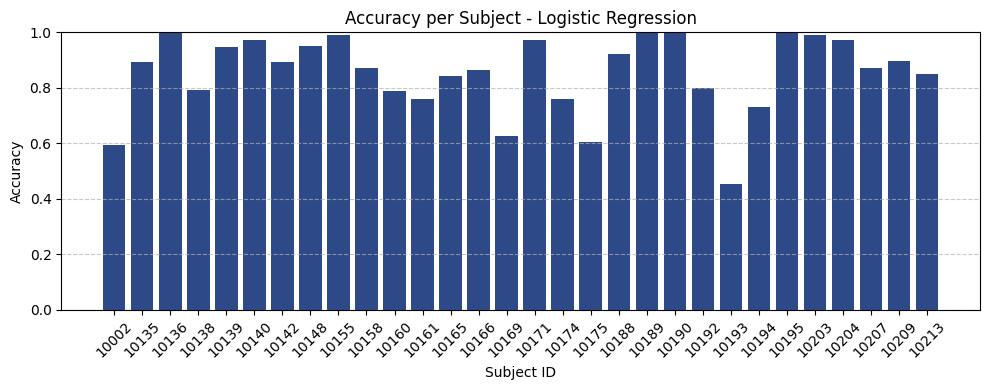

In [11]:
subject_accuracies_arr = np.array(subject_accuracies)
fold_accuracies_arr = np.array(fold_accuracies)

sorted_indices = np.argsort(subject_accuracies_arr)
sorted_subjects = subject_accuracies_arr[sorted_indices]
sorted_accuracies = fold_accuracies_arr[sorted_indices]

plt.figure(figsize=(10, 4))
plt.bar(sorted_subjects.astype(str), sorted_accuracies, color="#2d4987")
plt.title("Accuracy per Subject - Logistic Regression")
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

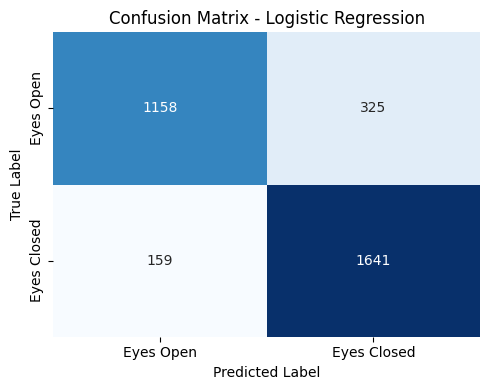

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
labels = ["Eyes Open", "Eyes Closed"]

# Plot with blue colormap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# Alpha power all channels

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, log_loss
)
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from collections import defaultdict

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# -------- INPUT DATA --------
alpha_min, alpha_max = 8, 13
freqs = psd.freqs  # Ensure this is defined
alpha_mask = (freqs >= alpha_min) & (freqs <= alpha_max)
alpha_freq_indices = np.where(alpha_mask)[0]

X_full = X_combined.reshape(-1, 19, len(freqs))
X_alpha = X_full[:, :, alpha_freq_indices]
X_flat = X_alpha.reshape(X_alpha.shape[0], -1)

y = y_combined
subjects = subject_ids
n_channels = X_alpha.shape[1]
n_freqs = X_alpha.shape[2]

# Hyperparameter search space
freq_bin_options = [2, 3, 4, 5]  # smaller bins for alpha band
C_grid = [0.01, 0.1, 1, 10, 100]

def reduce_freq_resolution(X, n_bins):
    bin_size = n_freqs // n_bins
    reduced = np.stack([
        X[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1)

# Outer LOSO
unique_subjects = np.unique(subjects)
outer_loo = LeaveOneOut()

all_y_true = []
all_y_pred = []
all_y_scores = []
all_probs_lr = []
fold_accuracies = []
subject_accuracies = []

best_n_bins_per_fold = []
best_C_per_fold = []

# Track mean inner CV scores for each (n_bins, C)
param_scores = defaultdict(list)

for fold_idx, (train_subj_idx, test_subj_idx) in enumerate(outer_loo.split(unique_subjects), 1):
    print(f"\r🔁 Alpha fold {fold_idx}/{len(unique_subjects)}", end="", flush=True)

    test_subj = unique_subjects[test_subj_idx[0]]
    train_subjs = unique_subjects[train_subj_idx]

    train_idx = np.where(np.isin(subjects, train_subjs))[0]
    test_idx = np.where(subjects == test_subj)[0]

    X_train_raw, X_test_raw = X_alpha[train_idx], X_alpha[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    subj_train_ids = subjects[train_idx]

    # --- Inner CV: select best (n_bins, C) ---
    inner_loo = LeaveOneOut()
    inner_subjects = np.unique(subj_train_ids)

    best_score = -np.inf
    best_n_bins = None
    best_C = None

    for n_bins in freq_bin_options:
        for C in C_grid:
            inner_scores = []

            for inner_train_idx, inner_val_idx in inner_loo.split(inner_subjects):
                inner_train_subjs = inner_subjects[inner_train_idx]
                inner_val_subj = inner_subjects[inner_val_idx[0]]

                inner_train_idxs = np.where(np.isin(subj_train_ids, inner_train_subjs))[0]
                inner_val_idxs = np.where(subj_train_ids == inner_val_subj)[0]

                X_inner_train = reduce_freq_resolution(X_train_raw[inner_train_idxs], n_bins)
                X_inner_val = reduce_freq_resolution(X_train_raw[inner_val_idxs], n_bins)
                y_inner_train = y_train[inner_train_idxs]
                y_inner_val = y_train[inner_val_idxs]

                scaler = StandardScaler()
                X_inner_train = scaler.fit_transform(X_inner_train)
                X_inner_val = scaler.transform(X_inner_val)

                clf = LogisticRegression(max_iter=1000, C=C)
                clf.fit(X_inner_train, y_inner_train)
                probs = clf.predict_proba(X_inner_val)[:, 1]
                loss = log_loss(y_inner_val, probs, labels=[0, 1])
                inner_scores.append(-loss)

            mean_score = np.mean(inner_scores)
            param_scores[(n_bins, C)].append(mean_score)

            if mean_score > best_score:
                best_score = mean_score
                best_n_bins = n_bins
                best_C = C

    best_n_bins_per_fold.append(best_n_bins)
    best_C_per_fold.append(best_C)

    # --- Train final model with best hyperparams ---
    X_train_final = reduce_freq_resolution(X_train_raw, best_n_bins)
    X_test_final = reduce_freq_resolution(X_test_raw, best_n_bins)

    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_final)
    X_test_final = scaler.transform(X_test_final)

    final_model = LogisticRegression(max_iter=1000, C=best_C)
    final_model.fit(X_train_final, y_train)

    y_prob = final_model.predict_proba(X_test_final)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_scores.extend(y_prob)
    all_probs_lr.append(y_prob)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    subject_accuracies.append(test_subj)

# Compute best overall alpha-band hyperparameters
avg_param_scores = {param: np.mean(scores) for param, scores in param_scores.items()}
best_n_bins_alpha_all, best_C_alpha_all = max(avg_param_scores.items(), key=lambda x: x[1])[0]

# ✅ Print results
print("\n\n Alpha-only LOSO complete!")
print(f"Overall Accuracy:  {accuracy_score(all_y_true, all_y_pred):.4f}")
print(f"Precision:         {precision_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print(f"Recall:            {recall_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print(f"F1 Score:          {f1_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, zero_division=0))

print("\n📄 Best alpha-band hyperparameters across all folds:")
print(f"   best_n_bins_alpha_all = {best_n_bins_alpha_all}")
print(f"   best_C_alpha_all = {best_C_alpha_all}")


🔁 Alpha fold 30/30

✅ Alpha-only LOSO complete!
Overall Accuracy:  0.7834
Precision:         0.8318
Recall:            0.7583
F1 Score:          0.7934

Confusion Matrix:
[[1207  276]
 [ 435 1365]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1483
           1       0.83      0.76      0.79      1800

    accuracy                           0.78      3283
   macro avg       0.78      0.79      0.78      3283
weighted avg       0.79      0.78      0.78      3283


📄 Best alpha-band hyperparameters across all folds:
  ✅ best_n_bins_alpha_all = 4
  ✅ best_C_alpha_all = 0.1


### Saving the different lists as separate npy files 

In [54]:
np.save("predicted_labels_alpha_all.npy", np.array(all_y_pred))
np.save("predicted_scores_alpha_all.npy", np.array(all_y_scores))
np.save("logreg_probabilites_alpha_all.npy", np.array(all_probs_lr, dtype=object))
np.save("accuracy_per_fold_alpha_all.npy", np.array(fold_accuracies))
np.save("subject_ids_alpha_all.npy", np.array(subject_accuracies))

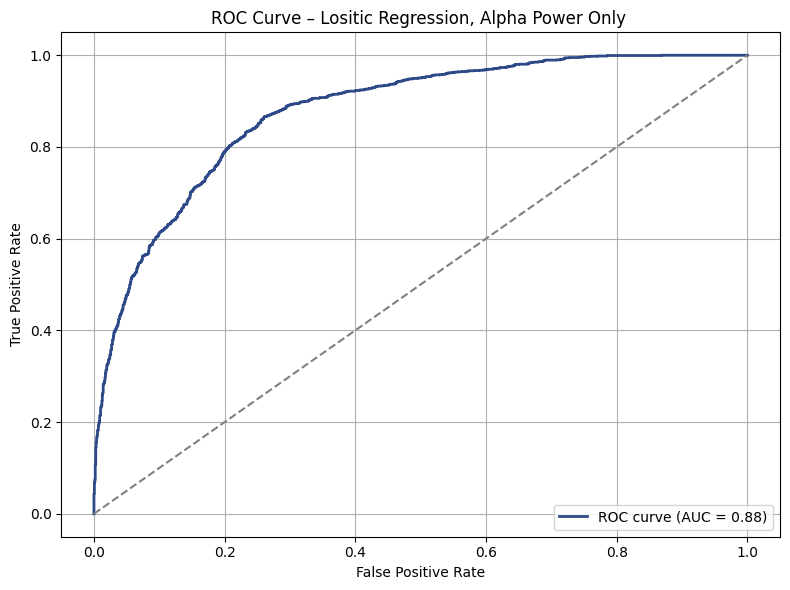

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#2d4987", lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Lositic Regression, Alpha Power Only ')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


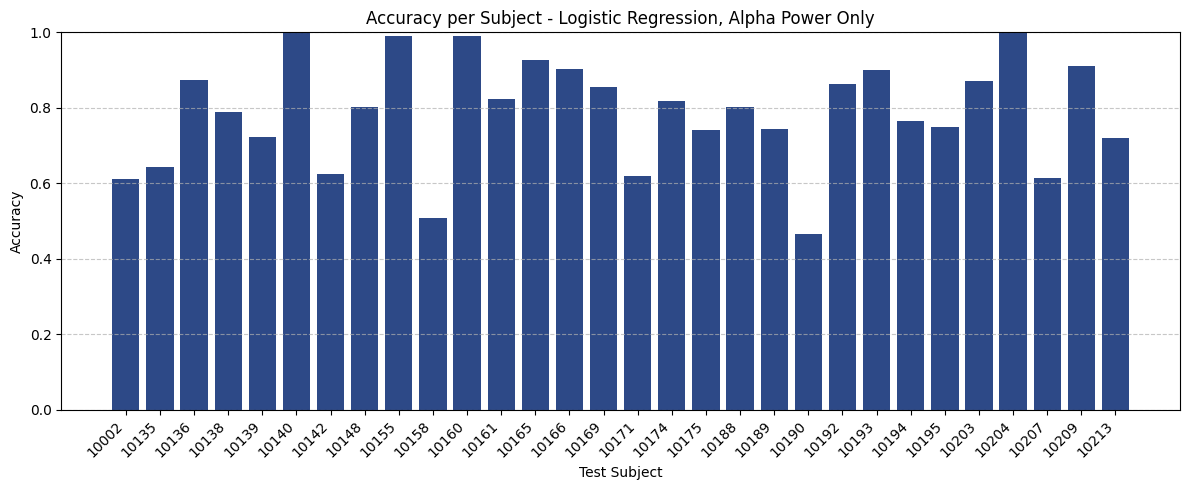

In [26]:
# 📊 Plot fold-accuracies

plt.figure(figsize=(12, 5))
plt.bar(fold_labels, fold_accuracies, color="#2d4987")

plt.title("Accuracy per Subject - Logistic Regression, Alpha Power Only")
plt.ylabel("Accuracy")
plt.xlabel("Test Subject")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

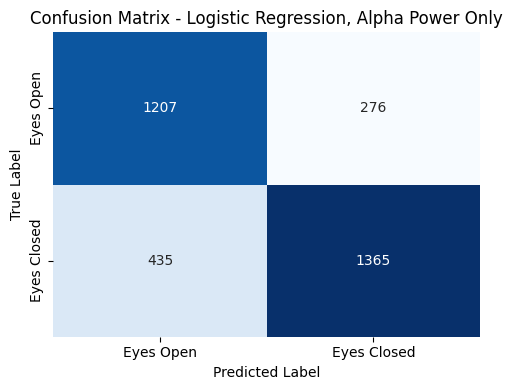

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Beregn confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
labels = ["Eyes Open", "Eyes Closed"]

# Plot confusion matrix med blå farveskala
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Logistic Regression, Alpha Power Only")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# Alpha power top 5 channels 

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, log_loss
)
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from collections import defaultdict

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# -------- INPUT --------
alpha_min, alpha_max = 8, 13
freqs = psd.freqs
alpha_mask = (freqs >= alpha_min) & (freqs <= alpha_max)
alpha_freq_indices = np.where(alpha_mask)[0]

X_full = X_combined.reshape(-1, 19, len(freqs))
X_alpha = X_full[:, :, alpha_freq_indices]  # Shape: (n_samples, 19, n_alpha_freqs)

y = y_combined
subjects = subject_ids

n_channels = 19
n_freqs = X_alpha.shape[2]

freq_bin_options = [2, 3, 4, 5]
C_grid = [0.01, 0.1, 1, 10, 100]

def reduce_freq_resolution(X, n_bins):
    bin_size = n_freqs // n_bins
    reduced = np.stack([
        X[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1), reduced  # include both flattened and per-channel

# --- Outer CV ---
outer_loo = LeaveOneOut()
unique_subjects = np.unique(subjects)

all_y_true, all_y_pred, all_y_scores, all_probs_lr = [], [], [], []
fold_accuracies, subject_accuracies = [], []
selected_channels_per_fold = []

# Store average inner scores for each (n_bins, C)
param_scores = defaultdict(list)

for fold_idx, (train_subj_idx, test_subj_idx) in enumerate(outer_loo.split(unique_subjects), 1):
    print(f"\r🔁 Fold {fold_idx}/{len(unique_subjects)}", end="", flush=True)

    test_subj = unique_subjects[test_subj_idx[0]]
    train_subjs = unique_subjects[train_subj_idx]
    train_idx = np.where(np.isin(subjects, train_subjs))[0]
    test_idx = np.where(subjects == test_subj)[0]

    X_train_raw, X_test_raw = X_alpha[train_idx], X_alpha[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    subj_train_ids = subjects[train_idx]

    # --- Hyperparameter tuning with inner CV ---
    best_score = -np.inf
    best_n_bins = None
    best_C = None
    best_model = None

    inner_loo = LeaveOneOut()
    inner_subjects = np.unique(subj_train_ids)

    for n_bins in freq_bin_options:
        for C in C_grid:
            inner_scores = []
            for inner_train_idx, inner_val_idx in inner_loo.split(inner_subjects):
                inner_train_subjs = inner_subjects[inner_train_idx]
                inner_val_subj = inner_subjects[inner_val_idx[0]]

                inner_train_idxs = np.where(np.isin(subj_train_ids, inner_train_subjs))[0]
                inner_val_idxs = np.where(subj_train_ids == inner_val_subj)[0]

                X_inner_train_raw = X_train_raw[inner_train_idxs]
                X_inner_val_raw = X_train_raw[inner_val_idxs]
                y_inner_train = y_train[inner_train_idxs]
                y_inner_val = y_train[inner_val_idxs]

                X_inner_train_flat, _ = reduce_freq_resolution(X_inner_train_raw, n_bins)
                X_inner_val_flat, _ = reduce_freq_resolution(X_inner_val_raw, n_bins)

                scaler = StandardScaler()
                X_inner_train_flat = scaler.fit_transform(X_inner_train_flat)
                X_inner_val_flat = scaler.transform(X_inner_val_flat)

                clf = LogisticRegression(max_iter=1000, C=C)
                clf.fit(X_inner_train_flat, y_inner_train)
                probs = clf.predict_proba(X_inner_val_flat)[:, 1]
                loss = log_loss(y_inner_val, probs, labels=[0, 1])
                inner_scores.append(-loss)

            mean_score = np.mean(inner_scores)
            param_scores[(n_bins, C)].append(mean_score)

            if mean_score > best_score:
                best_score = mean_score
                best_n_bins = n_bins
                best_C = C

    # --- Fit model on full training set to select top channels ---
    X_train_full_flat, X_train_per_channel = reduce_freq_resolution(X_train_raw, best_n_bins)
    scaler = StandardScaler()
    X_train_full_flat = scaler.fit_transform(X_train_full_flat)

    clf_full = LogisticRegression(max_iter=1000, C=best_C)
    clf_full.fit(X_train_full_flat, y_train)

    # --- Select top 5 channels based on coefficients ---
    coefs = clf_full.coef_.flatten()
    X_shape = X_train_per_channel.shape  # (n_samples, 19, n_bins)
    n_bins = X_shape[2]

    coefs_per_channel = np.abs(coefs.reshape(n_channels, n_bins)).mean(axis=1)
    top5_channel_indices = np.argsort(coefs_per_channel)[-5:]

    selected_channels_per_fold.append(top5_channel_indices)

    # --- Restrict training/test data to top 5 channels ---
    X_train_reduced = X_train_raw[:, top5_channel_indices, :]
    X_test_reduced = X_test_raw[:, top5_channel_indices, :]

    X_train_final, _ = reduce_freq_resolution(X_train_reduced, best_n_bins)
    X_test_final, _ = reduce_freq_resolution(X_test_reduced, best_n_bins)

    X_train_final = scaler.fit_transform(X_train_final)
    X_test_final = scaler.transform(X_test_final)

    final_model = LogisticRegression(max_iter=1000, C=best_C)
    final_model.fit(X_train_final, y_train)

    y_prob = final_model.predict_proba(X_test_final)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_scores.extend(y_prob)
    all_probs_lr.append(y_prob)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    subject_accuracies.append(test_subj)

# --- Compute best overall hyperparameters ---
avg_param_scores = {param: np.mean(scores) for param, scores in param_scores.items()}
best_n_bins_alpha_5, best_C_alpha_5 = max(avg_param_scores.items(), key=lambda x: x[1])[0]

# --- Final Results ---
print("\n\n Alpha-only (5-best channels) LOSO complete!")
print(f"Overall Accuracy:  {accuracy_score(all_y_true, all_y_pred):.4f}")
print(f"Precision:         {precision_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print(f"Recall:            {recall_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print(f"F1 Score:          {f1_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, zero_division=0))

print("\n Best alpha-band (top-5 channels) hyperparameters across all folds:")
print(f" best_n_bins_alpha_5 = {best_n_bins_alpha_5}")
print(f" best_C_alpha_5 = {best_C_alpha_5}")


🔁 Fold 30/30

✅ Alpha-only (5-best channels) LOSO complete!
Overall Accuracy:  0.7679
Precision:         0.8297
Recall:            0.7256
F1 Score:          0.7742

Confusion Matrix:
[[1215  268]
 [ 494 1306]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1483
           1       0.83      0.73      0.77      1800

    accuracy                           0.77      3283
   macro avg       0.77      0.77      0.77      3283
weighted avg       0.78      0.77      0.77      3283


📄 Best alpha-band (top-5 channels) hyperparameters across all folds:
  ✅ best_n_bins_alpha_5 = 4
  ✅ best_C_alpha_5 = 0.1


In [52]:
np.save("predicted_labels_alpha_top5.npy", np.array(all_y_pred))
np.save("predicted_scores_alpha_top5.npy", np.array(all_y_scores))
np.save("logreg_probabilites_alpha_top5.npy", np.array(all_probs_lr, dtype=object))
np.save("accuracy_per_fold_alpha_top5.npy", np.array(fold_accuracies))
np.save("subject_ids_alpha_top5.npy", np.array(subject_accuracies))

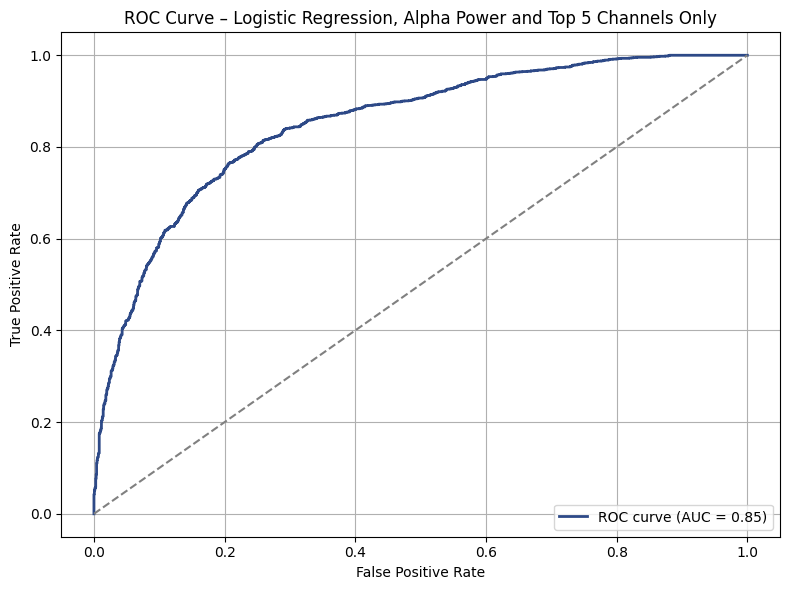

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#2d4987", lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression, Alpha Power and Top 5 Channels Only')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


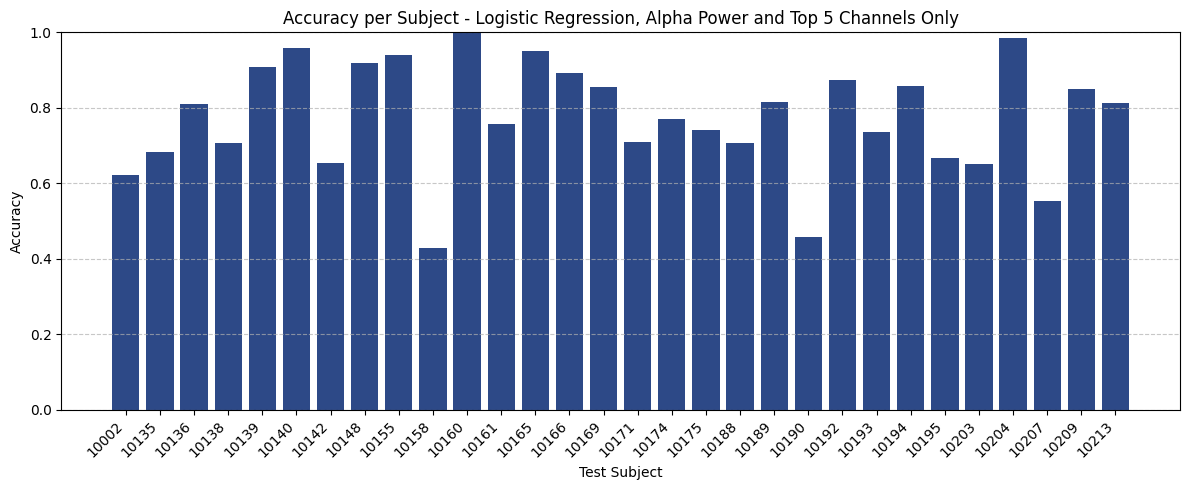

In [30]:
# 📊 Bar plot over accuracy per fold
plt.figure(figsize=(12, 5))
plt.bar(fold_labels, fold_accuracies,color="#2d4987")
plt.title("Accuracy per Subject - Logistic Regression, Alpha Power and Top 5 Channels Only")
plt.ylabel("Accuracy")
plt.xlabel("Test Subject")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

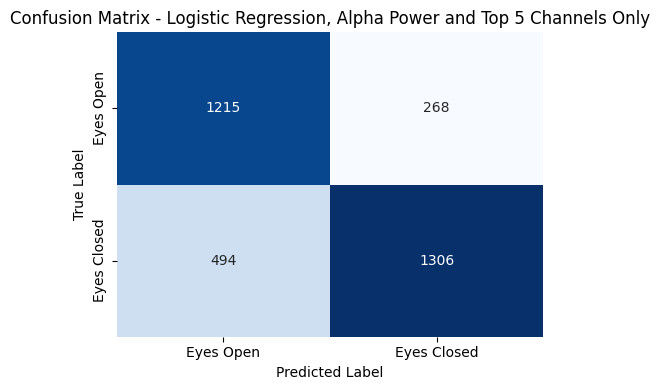

In [31]:
import seaborn as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Beregn confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
labels = ["Eyes Open", "Eyes Closed"]

# Plot med blå farveskala
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Logistic Regression, Alpha Power and Top 5 Channels Only")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# Alpha power only O1 and O2

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, log_loss
)
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from collections import defaultdict

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# -------- INPUT DATA --------
alpha_min, alpha_max = 8, 13
freqs = psd.freqs  # Make sure this exists and matches X_combined
alpha_mask = (freqs >= alpha_min) & (freqs <= alpha_max)
alpha_freq_indices = np.where(alpha_mask)[0]

# Extract alpha band and reshape
X_full = X_combined.reshape(-1, 19, len(freqs))
X_alpha = X_full[:, :, alpha_freq_indices]

# ✅ Keep only O1 and O2 (assumed to be channels 8 and 9)
o1_o2_indices = [8, 9]
X_alpha = X_alpha[:, o1_o2_indices, :]
n_channels = X_alpha.shape[1]  # Now 2
n_freqs = X_alpha.shape[2]

# Labels and subject IDs
y = y_combined
subjects = subject_ids

# Hyperparameter search space
freq_bin_options = [2, 3, 4, 5]
C_grid = [0.01, 0.1, 1, 10, 100]

best_n_bins_per_fold = []
best_C_per_fold = []

def reduce_freq_resolution(X, n_bins):
    bin_size = n_freqs // n_bins
    reduced = np.stack([
        X[:, :, i * bin_size:(i + 1) * bin_size].mean(axis=2)
        for i in range(n_bins)
    ], axis=2)
    return reduced.reshape(X.shape[0], -1)

# Outer LOSO
unique_subjects = np.unique(subjects)
outer_loo = LeaveOneOut()

all_y_true = []
all_y_pred = []
all_y_scores = []
all_probs_lr = []
fold_accuracies = []
subject_accuracies = []

# Track mean inner CV scores for each (n_bins, C)
param_scores = defaultdict(list)

for fold_idx, (train_subj_idx, test_subj_idx) in enumerate(outer_loo.split(unique_subjects), 1):
    print(f"\r🔁 Alpha O1+O2 fold {fold_idx}/{len(unique_subjects)}", end="", flush=True)

    test_subj = unique_subjects[test_subj_idx[0]]
    train_subjs = unique_subjects[train_subj_idx]

    train_idx = np.where(np.isin(subjects, train_subjs))[0]
    test_idx = np.where(subjects == test_subj)[0]

    X_train_raw, X_test_raw = X_alpha[train_idx], X_alpha[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    subj_train_ids = subjects[train_idx]

    # --- Inner CV: select best (n_bins, C) ---
    inner_loo = LeaveOneOut()
    inner_subjects = np.unique(subj_train_ids)

    best_score = -np.inf
    best_n_bins = None
    best_C = None

    for n_bins in freq_bin_options:
        for C in C_grid:
            inner_scores = []

            for inner_train_idx, inner_val_idx in inner_loo.split(inner_subjects):
                inner_train_subjs = inner_subjects[inner_train_idx]
                inner_val_subj = inner_subjects[inner_val_idx[0]]

                inner_train_idxs = np.where(np.isin(subj_train_ids, inner_train_subjs))[0]
                inner_val_idxs = np.where(subj_train_ids == inner_val_subj)[0]

                X_inner_train = reduce_freq_resolution(X_train_raw[inner_train_idxs], n_bins)
                X_inner_val = reduce_freq_resolution(X_train_raw[inner_val_idxs], n_bins)
                y_inner_train = y_train[inner_train_idxs]
                y_inner_val = y_train[inner_val_idxs]

                scaler = StandardScaler()
                X_inner_train = scaler.fit_transform(X_inner_train)
                X_inner_val = scaler.transform(X_inner_val)

                clf = LogisticRegression(max_iter=1000, C=C)
                clf.fit(X_inner_train, y_inner_train)
                probs = clf.predict_proba(X_inner_val)[:, 1]
                loss = log_loss(y_inner_val, probs, labels=[0, 1])
                inner_scores.append(-loss)

            mean_score = np.mean(inner_scores)
            param_scores[(n_bins, C)].append(mean_score)

            if mean_score > best_score:
                best_score = mean_score
                best_n_bins = n_bins
                best_C = C

    best_n_bins_per_fold.append(best_n_bins)
    best_C_per_fold.append(best_C)

    # --- Train final model with best hyperparams ---
    X_train_final = reduce_freq_resolution(X_train_raw, best_n_bins)
    X_test_final = reduce_freq_resolution(X_test_raw, best_n_bins)

    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_final)
    X_test_final = scaler.transform(X_test_final)

    final_model = LogisticRegression(max_iter=1000, C=best_C)
    final_model.fit(X_train_final, y_train)

    y_prob = final_model.predict_proba(X_test_final)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_scores.extend(y_prob)
    all_probs_lr.append(y_prob)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    subject_accuracies.append(test_subj)

#  Compute best overall hyperparameters
avg_param_scores = {param: np.mean(scores) for param, scores in param_scores.items()}
best_n_bins_alpha_o, best_C_alpha_o = max(avg_param_scores.items(), key=lambda x: x[1])[0]

# ✅ Print results
print("\n\n Alpha-only LOSO (O1 & O2) complete!")
print(f"Overall Accuracy:  {accuracy_score(all_y_true, all_y_pred):.4f}")
print(f"Precision:         {precision_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print(f"Recall:            {recall_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print(f"F1 Score:          {f1_score(all_y_true, all_y_pred, zero_division=0):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, zero_division=0))

print("\n📄 Best alpha-band hyperparameters for O1+O2 across all folds:")
print(f"  best_n_bins_alpha_o = {best_n_bins_alpha_o}")
print(f"  best_C_alpha_o = {best_C_alpha_o}")


🔁 Alpha O1+O2 fold 30/30

✅ Alpha-only LOSO (O1 & O2) complete!
Overall Accuracy:  0.7240
Precision:         0.8386
Recall:            0.6150
F1 Score:          0.7096

Confusion Matrix:
[[1270  213]
 [ 693 1107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1483
           1       0.84      0.61      0.71      1800

    accuracy                           0.72      3283
   macro avg       0.74      0.74      0.72      3283
weighted avg       0.75      0.72      0.72      3283


📄 Best alpha-band hyperparameters for O1+O2 across all folds:
  ✅ best_n_bins_alpha_o = 5
  ✅ best_C_alpha_o = 0.01


In [ ]:
np.save("subject_ids_alpha_occipital.npy", np.array(subject_accuracies))

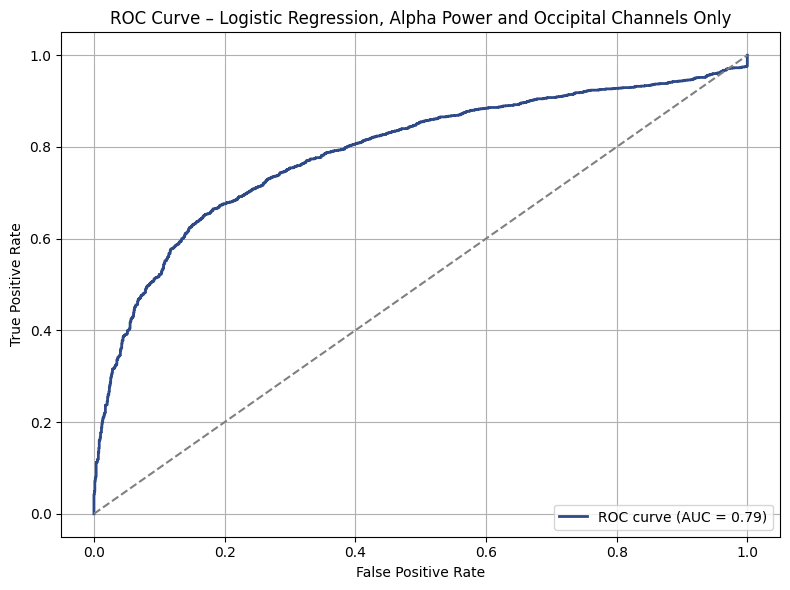

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#2d4987", lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression, Alpha Power and Occipital Channels Only')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


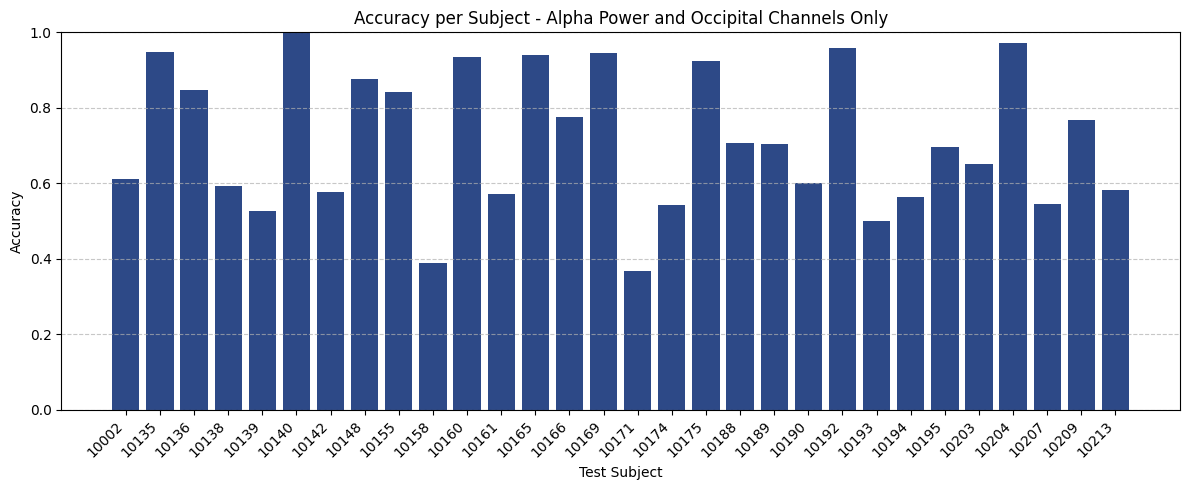

In [37]:
# 📊 Bar plot for accuracy per subject
plt.figure(figsize=(12, 5))
plt.bar(fold_labels, fold_accuracies,color="#2d4987")
plt.title("Accuracy per Subject - Alpha Power and Occipital Channels Only")
plt.ylabel("Accuracy")
plt.xlabel("Test Subject")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

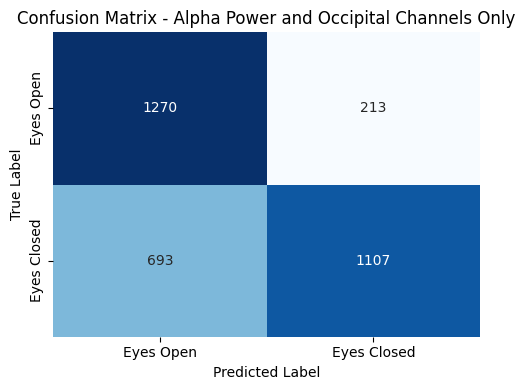

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Beregn confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
labels = ["Eyes Open", "Eyes Closed"]

# Plot med blå farver
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Alpha Power and Occipital Channels Only")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()